<a href="https://colab.research.google.com/github/AJ112103/IML_Assignment_2A/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset  = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
testloader  = torch.utils.data.DataLoader(testset,  batch_size=256, shuffle=False)

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

100%|██████████| 170M/170M [00:06<00:00, 24.9MB/s]


In [ ]:
class LogisticRegressionCIFAR(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc = nn.Linear(3*32*32, 10)

  def forward(self, x):
    x = x.view(x.size(0), -1)
    return self.fc(x)

model = LogisticRegressionCIFAR().to(device)

In [ ]:
lr = 0.01
epochs = 10
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

In [ ]:
train_acc_history = []
test_acc_history = []

for epoch in range(epochs):

  model.train()
  correct = total = 0
  for inputs, labels in trainloader:
    inputs, labels = inputs.to(device), labels.to(device)
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    _, preds = outputs.max(1)
    correct += (preds++labels).sum().item()
    total += labels.size(0)
  train_acc = correct/total
  train_acc_history.append(train_acc)

  model.eval()
  correct = total = 0
  with torch.no_grad():
    for inputs, labels in testloader:
      inputs, labels = inputs.to(device), labels.to(device)
      outputs = model(inputs)
      _, preds = outputs.max(1)
      correct += (preds == labels).sum().item()
      total += labels.size(0)
  test_acc = correct/total
  test_acc_history.append(test_acc)

  print(f'Epoch {epoch+1}/{epochs}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

Epoch 1/10, Train Acc: 9.5869, Test Acc: 0.3853
Epoch 2/10, Train Acc: 9.3693, Test Acc: 0.3943
Epoch 3/10, Train Acc: 9.3317, Test Acc: 0.3974
Epoch 4/10, Train Acc: 9.2739, Test Acc: 0.3972
Epoch 5/10, Train Acc: 9.2576, Test Acc: 0.4058
Epoch 6/10, Train Acc: 9.2284, Test Acc: 0.4065
Epoch 7/10, Train Acc: 9.2018, Test Acc: 0.4082
Epoch 8/10, Train Acc: 9.1882, Test Acc: 0.4049
Epoch 9/10, Train Acc: 9.1762, Test Acc: 0.4073
Epoch 10/10, Train Acc: 9.1512, Test Acc: 0.4081


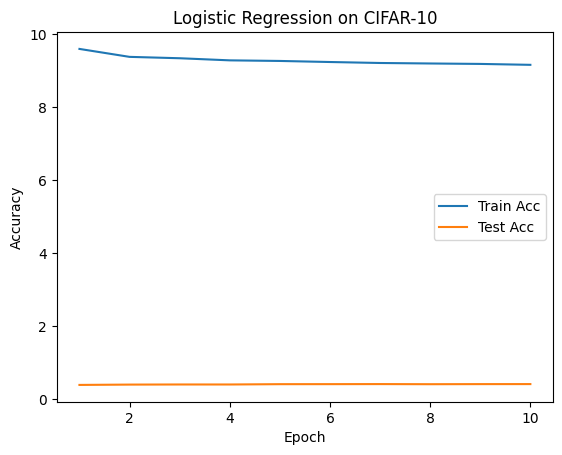

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, epochs+1), train_acc_history, label='Train Acc')
plt.plot(range(1, epochs+1), test_acc_history,  label='Test Acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()
plt.title('Logistic Regression on CIFAR-10')
plt.show()